In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

df=pd.read_csv("australia_EV.csv")
df = df.drop(df.columns[0], axis=1)
df

,year,value
0,2011,49
1,2012,170
2,2013,190
3,2014,370
4,2015,760
5,2016,670
6,2017,1200
7,2018,1800
8,2019,6300
9,2020,5200


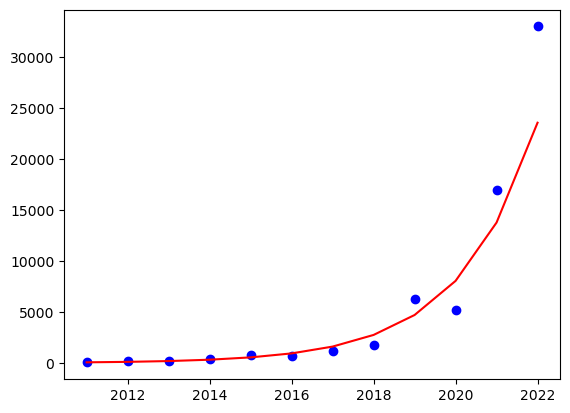

In [18]:
import numpy as np
# Transform the data
df['log_value'] = df['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
model = LinearRegression()
model.fit(df[['year']], df['log_value'])

# Plot the old data and regression line
plt.scatter(df['year'], df['value'], color='blue', label='Old Data')
plt.plot(df['year'], np.exp(model.predict(df[['year']])), color='red', label='Regression Line')


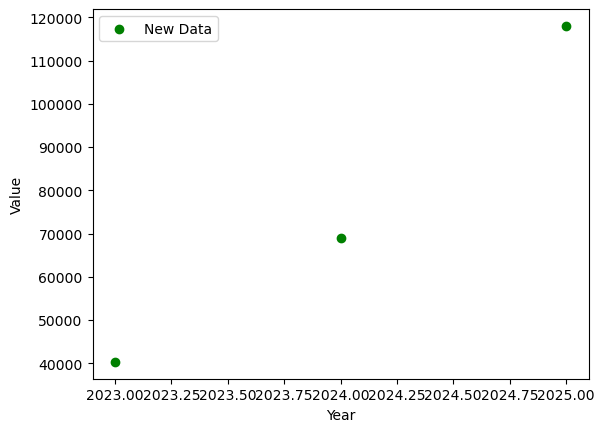

In [19]:
# Predict the 'value' for future 'years'
future_years = [2023, 2024, 2025]
future_df = pd.DataFrame({'year': future_years})
future_df['predicted_log_value'] = model.predict(future_df[['year']])
future_df['predicted_value'] = future_df['predicted_log_value'].apply(lambda x: np.exp(x))

# Plot the new data and predicted values
plt.scatter(future_df['year'], future_df['predicted_value'], color='green', label='New Data')
# Set the labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


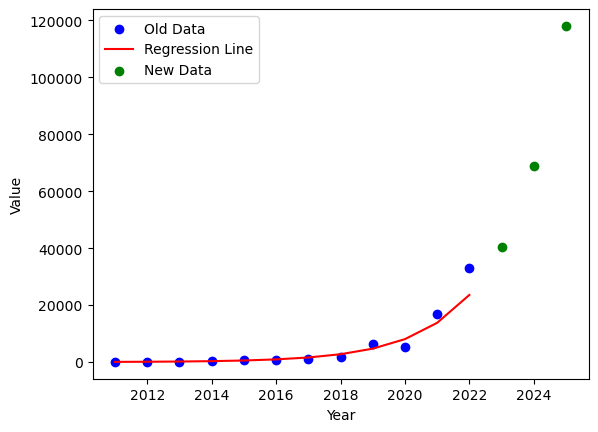

In [22]:
# Plot the old data and regression line
plt.scatter(df['year'], df['value'], color='blue', label='Old Data')
plt.plot(df['year'], np.exp(model.predict(df[['year']])), color='red', label='Regression Line')

# Plot the new data and predicted values
plt.scatter(future_df['year'], future_df['predicted_value'], color='green', label='New Data')
# Set the labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [24]:
future_df

,year,predicted_log_value,predicted_value
0,2023,10.604434,40313.177031
1,2024,11.141471,68973.024487
2,2025,11.678508,118008.017656
